<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/twyncoder/tf-handson-tcb/blob/main/L02_TrainDNN_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes de Aprendizaje Profundo básicas con Keras y Tensorflow.
## *Deep Neural Networks (DNN) para clasificación multi-clase*

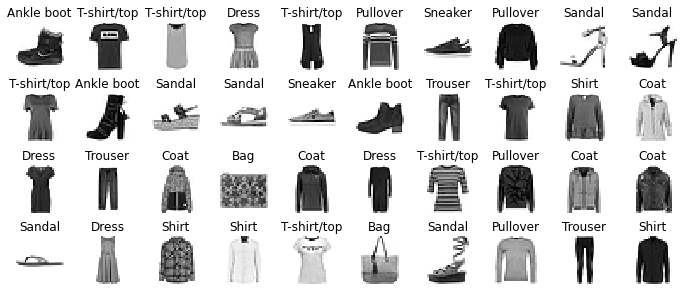

## 0. Preparación del entorno y comprobación de requisitos

In [ ]:
# Common imports
import os
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def print_history(history,title=None, extension='png'):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    #plt.gca().set_ylim(0, 1)
    plt.xlabel("epochs")
    if(title!=None):
        plt.title(title)
        save_fig(title,fig_extension=extension)

### Información de versiones

In [ ]:
tf.__version__

### Comprobar si disponemos de una GPU

In [ ]:
tf.config.list_physical_devices('GPU')

## 1. Dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]

**¡AHORA TÚ!**
- Repasa el notebook de la sesión anterior y averiguar si tenemos que hacer algún otro paso importante con el dataset

## 2. Entrenamiento

### Modelo 'base' de red neuronal

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

- Observa que en cada _epoch_ se ejecuta un número de _steps_ de entrenamiento igual a 1719. ¿Sabes explicar qué les ocurre a los parámetros de la red en cada _step_ del entrenamiento?
- El número de _steps_ depende de:
 - El tamaño del _batch_ que se utilice (en Keras se utiliza 32 por defecto).
 - El número de muestras de entrenamiento. 
- Por tanto, podemos calcular el número de _steps_ de la siguiente manera:

In [ ]:
import math
batch_size = 32
n_epochs = 30
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
print(n_steps_per_epoch)

**¡AHORA TÚ!**
- ¿Qué tal ha ido el entrenamiento anterior con la función _sigmoid_? ¿Qué valores se alcanzan de `accuracy` y de `val_accuracy`? 
- Muestra una gráfica con la evolución del entrenamiento a lo largo de los epochs.




In [ ]:
#TODO

**¡AHORA TÚ!**
- ¿Cómo evolucionará el entrenamiento con más _epochs_? ¿Qué valores se alcanzan de `accuracy` y de `val_accuracy` para 20 _epochs_? 
- Prueba a seguir entrenando ejecutando de nuevo la celda siguiente. Date cuenta de que estaremos reentrenando por otras 10 epochs.

In [ ]:
history2 = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

In [ ]:

total_history = pd.concat([pd.DataFrame(history.history), pd.DataFrame(history2.history)], axis=0,ignore_index=True)
total_history = total_history.reindex()
total_history.plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title("DNN Sigmoid 20 epochs")
plt.xlabel("epochs")

### Funciones de activación y learning rate

- Observa, a continuación, las diferentes funciones de activación disponibles en Keras

In [ ]:
[m for m in dir(keras.activations) if not m.startswith("_")]

**¡AHORA TÚ!**
- Prueba a entrenar la red con activaciones `tanh` o `relu` en lugar de `sigmoid`.
- Compara las gráfica de entrenamiento con el modelo anterior.

In [ ]:
#TODO MODEL DEFINITION

In [ ]:
#TODO MODEL COMPILE

In [ ]:
#TODO MODEL TRAIN

In [ ]:
print_history(history,"L02_relutraining")

**¡AHORA TÚ!**
- Utilizando `relu`como función de activación
- ¿Qué ocurre si usamos `learning_rate` 1e-2 durante 35 epochs? 
- Muestra una gráfica y comprueba si se produce sobre-entrenamiento  

In [ ]:
#TODO

In [ ]:
print_history(history,"L02_relutraining_lr1e-2")

### Batch normalization

En la teoría vimos cómo la técnica de _Batch Normalization_ consigue entrenamientos más estables. Las ventajas son las siguientes:
- Reduce el problema de desvanecimiento de gradiente.
- Permite usar tasas de aprendizaje mayores.
- Permite una convergencia de la red más rápida.
- Actúa como técnica de regularización.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(100, use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

In [ ]:
print_history(history,"L02_relutraining_batch")

**¡AHORA TÚ!**
- Observa que al utilizar capas `BatchNormalization()` ya no es necesario que las capas intermedias de la red tengan un término de bias, por lo que no lo incluimos en la definición de nuestra red. Debe aplicarse antes de la función de activación.
- ¿Cómo se explica que el número de parámetros pase de 0 a 3136 en la segunda capa? ¿Cómo se calcula el número de parámetros de las capas con _batch_normalization_?
- ¿Ha mejorado el rendimiento respecto al otro entrenamiento que hicimos con funciones `relu`, `learning_rate=1e-3` y `epochs=20` pero sin _batch_normalization_?

### Optimizadores

- Hasta ahora solamente hemos utilizado SGD como optimizador. 
- Observa algunas otras opciones disponibles en Keras.
- También es posible pasar como parámetro a `model.compile(optimizer='adam',...)` el nombre del optimizador para utilizar los parámetros por defecto

```
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
```

**¡AHORA TÚ!**
- Utilizando la siguiente red, prueba uno dos optimizadores (Por ejemplo _RMSProp_ y _Adam_) y compara la evolución del entrenamiento a lo largo de unas 15 ó 20 `epochs`, respecto a lo que ocurría con SGD.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(100, use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

In [ ]:
#TODO MODEL COMPILE

In [ ]:
#TODO MODEL TRAIN

In [ ]:
print_history(history,"L02_relutraining_batch_adam")

- Observa que con estos optimizadores en menos épocas es posible llegar a tasas de acierto similares
- Los casos de sobreaprendizaje se observan antes también 

# 3. Test

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Loss y accuracy

In [ ]:
model.evaluate(X_test, y_test)

### Matriz de confusión

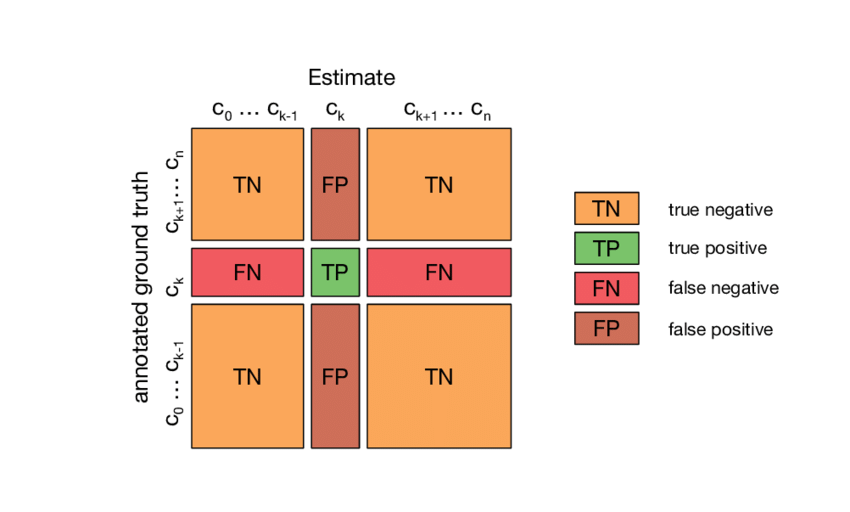

In [ ]:
y_true = y_test
y_pred = np.argmax(model.predict(X_test),axis=-1)

In [ ]:
print(y_true)
print(y_pred)

In [ ]:
confnorm = confusion_matrix(y_true, y_pred,normalize='true')

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confnorm,
                                display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**¡AHORA TÚ!**
- En la matriz de confusión las clases verdaderas se indican a la izquierda y las clases predichas en la parte superior. 
- Mirando la diagonal de la matriz de confusión normalizada:
   - Indica cuál ha sido la clase que mejor se ha predicho y el porcentaje de muestras correctamente clasificadas.
   - Indica cuál ha sido la clase que peor se ha predicho y el porcentaje de muestras correctamente clasificadas.


In [ ]:
conf = confusion_matrix(y_true, y_pred)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf,
                                display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**¡AHORA TÚ!**
- En la matriz de confusión las clases verdaderas se indican a la izquierda y las clases predichas en la parte superior. 
- Mirando la matriz de confusión sin normalizar, responde:
   - True Positives (TP): ¿Cuántas muestras de test se han clasificado correctamente para la clase que mejor se ha predicho y cuántas para la clase que peor se ha predicho?
   - False Negatives (FN): Para las muestras que pertenecen a la clase peor predicha, ¿con qué otras clases se han clasificado erróneamente?. Tendrás que buscar en una de las filas de la matriz.
   - False Positives (FP): ¿Las muestras de qué otras clases se han clasificado erroneamente como pertenecientes a dicha clase?. Tendrás que buscar en una de las columnas de la matriz.